## Annotate MT variants using mseqdr tool

Reference and curl API instructions: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5992054/   
Database: https://mseqdr.org/portal.php?dbsource=genomic&name=m.16127A%3EG&x=0&y=0

In [18]:
# The input vcf path
raw_vcf = "/data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/donor0.vcf"
out_f = "/data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/donor0.vcf.json"
mt_fasta = "/data/Mito_Trace/data/external/GRCh38_MT_blacklist/chrM.fasta" # "example_data/hg19_chr22.fa"

In [14]:
from Bio import SeqIO
import pandas as pd

In [21]:
for record in SeqIO.parse(mt_fasta, "fasta"):
    mt_seq = record.seq
mt_seq

Seq('GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGG...ATG')

In [2]:
vcf_path = raw_vcf.replace(".vcf", ".fmt.vcf")

In [3]:
vcf = pd.read_csv(raw_vcf, sep='\t')
vcf["QUAL"] = "."
vcf["FILTER"] = "."
vcf["INFO"] = "."
vcf["ID"] = "."
vcf["REF"] = vcf["REF"].apply(lambda x: x[-1])
vcf = vcf[["#CHROM" ,"POS","ID","REF","ALT","QUAL","FILTER","INFO"]]
vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO
0,chrM,58,.,T,C,.,.,.
1,chrM,64,.,C,T,.,.,.
2,chrM,146,.,T,C,.,.,.
3,chrM,150,.,C,T,.,.,.
4,chrM,152,.,T,C,.,.,.
...,...,...,...,...,...,...,...,...
226,chrM,16311,.,T,C,.,.,.
227,chrM,16311,.,T,G,.,.,.
228,chrM,16387,.,A,G,.,.,.
229,chrM,16519,.,T,G,.,.,.


In [4]:
header = "##fileformat=VCFv4.0"
header = header + "\n" + f"##reference=file:/{mt_fasta}"
#vcf.to_csv(vcf_path, sep='\t', index=False)
with open(vcf_path, 'a') as file:
    file.write(header)
    vcf.to_csv(vcf_path, sep='\t', index=False)

## Create proper formatted vcf file

In [5]:
cmd = f"curl -s -X POST https://mseqdr.org/mtannotapi.php?format=vcf --data-binary @{vcf_path} -o {out_f}"
print(cmd)

curl -s -X POST https://mseqdr.org/mtannotapi.php?format=vcf --data-binary @/data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/donor0.fmt.vcf -o /data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/donor0.vcf.json


In [6]:
!{cmd}

# Check results

In [9]:
import json
var_ann = json.load(open(out_f))
var_ann

{'mseqdr': [{'Input': 'm.58T>C',
   'HGVS_g': None,
   'AF_M1': '0.0059',
   'M1_cnt': '9/1534',
   'AF_mitomap': '0.0015',
   'Mitomap_cnt': '77',
   'Mitomap_Pubmed': 'OMITTED',
   'Mitomap_Allele': '-',
   'Mitomap_Disease': '-',
   'Heteroplasmy': '-',
   'Mitomap_status': '-',
   'HmtDB': '-',
   'NT_variability': '-',
   'AF_A_GeneDX': '0.0045850000000000005',
   'AF_C_GeneDX': '0.0004',
   'AF_G_GeneDX': '0',
   'AF_T_GeneDX': '0.995',
   'Total_GeneDX': '5453',
   'AF_GEMapp': '-',
   'Genotype_GEMAPP': '-',
   'Homoplasmy': '-',
   'AA_variability': '-',
   'HmtDB_disease': '-'},
  {'Input': 'm.64C>T',
   'HGVS_g': None,
   'AF_M1': '0.0215',
   'M1_cnt': '33/1534',
   'AF_mitomap': '0.030699999999999998',
   'Mitomap_cnt': '1538',
   'Mitomap_Pubmed': 'OMITTED',
   'Mitomap_Allele': '-',
   'Mitomap_Disease': '-',
   'Heteroplasmy': '-',
   'Mitomap_status': '-',
   'HmtDB': '64T',
   'NT_variability': '0.117235',
   'AF_A_GeneDX': '0',
   'AF_C_GeneDX': '0.9776',
   'AF_G_Ge

In [10]:
var_ann.keys()

dict_keys(['mseqdr', 'general', 'population', 'mutalyzer', 'ensembl_vep_grch37', 'dbnsfp', 'hgmd'])

In [ ]:
population = pd.DataFrame(var_ann["population"]).set_index("Input")
population
population = pd.DataFrame(var_ann["population"]).set_index("Input")
print(population.shape)
population[population=="-"] = np.nan
population = population.dropna(how="all", axis=1)
print(population.shape)


In [69]:
population = pd.DataFrame(var_ann["population"]).set_index("Input")
print(population.shape)
population[population=="-"] = np.nan
population = population.dropna(how="all", axis=1)
print(population.shape)

dbnsfp = pd.DataFrame(var_ann["dbnsfp"]).set_index("Input")
print(dbnsfp.shape)
dbnsfp[dbnsfp=="-"] = np.nan
dbnsfp = dbnsfp.dropna(how="all", axis=1)
print(dbnsfp.shape)

dbnsfp["Ensembl_transcriptid"].unique()

mseqdr = pd.DataFrame(var_ann["mseqdr"]).set_index("Input")
print(mseqdr.shape)
mseqdr[mseqdr=="-"] = np.nan
mseqdr = mseqdr.dropna(how="all", axis=1)
print(mseqdr.shape)


general= pd.DataFrame(var_ann["general"]).set_index("Input")
general
{x:general[x].unique() for x in general.columns}
print(general.shape)
general[general=="-"] = np.nan
general = general.dropna(how="all", axis=1)
print(general.shape)

(231, 20)
(231, 4)
(231, 63)
(231, 62)
(231, 22)
(231, 16)
(231, 24)
(231, 17)


In [97]:
var_anno_df = pd.concat([general, population, dbnsfp, mseqdr.drop(["AF_M1", "M1_cnt"], axis=1)], axis=1, verify_integrity=True)
var_anno_df

,Chr,Pos,GERP,Reference,LSDB_ID,LSDB_DBID,LSDB_hgvs_g,ClinVar_RCVaccession,ClinVar_Name,ClinVar_ClinicalSignificance,...,Mitomap_Disease,Heteroplasmy,Mitomap_status,HmtDB,NT_variability,AF_A_GeneDX,AF_C_GeneDX,AF_G_GeneDX,AF_T_GeneDX,Total_GeneDX
Input,,,,,,,,,,,,,,,,,,,,,
m.58T>C,M,58,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0045850000000000005,0.0004,0,0.995,5453
m.64C>T,M,64,0,NaN,0000004740,chrM_001238,m.64C>T,NaN,NaN,NaN,...,NaN,NaN,NaN,64T,0.117235,0,0.9776,0,0.0222,5453
m.146T>C,M,146,0,NaN,0000004070,chrM_001244,m.146T>C,NaN,NaN,NaN,...,Absence of Endometriosis,NaN,Reported,146C,0.6833904,0.00036700000000000003,0.1649,0,0.8348,5453
m.150C>T,M,150,0,NaN,0000004110,chrM_001245,m.150C>T,NaN,NaN,NaN,...,Longevity / Cervical Carcinoma / HPV infection...,+,Conflicting_reports,150T,0.4401729,0,0.8702,0,0.1298,5453
m.152T>C,M,152,0,NaN,0000004130,chrM_001246,m.152T>C,NaN,NaN,NaN,...,NaN,NaN,NaN,152C,0.7933905,0,0.272,0.000183,0.7218000000000001,5453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m.16311T>C,M,16311,-6.7,NaN,0000004258,chrM_000347,m.16311T>C,NaN,NaN,NaN,...,NaN,NaN,NaN,16311C,0.6492689,0,0.2014,0,0.7986,5453
m.16311T>G,M,16311,-6.7,NaN,0000004258,chrM_000347,m.16311T>C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0.2014,0,0.7986,5453
m.16387A>G,M,16387,-4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
pos = var_anno_df.groupby("Pos").size()>1
var_anno_df.loc[var_anno_df["Pos"].isin(pos[pos].index)].sort_values("Pos")

,Chr,Pos,GERP,Reference,LSDB_ID,LSDB_DBID,LSDB_hgvs_g,ClinVar_RCVaccession,ClinVar_Name,ClinVar_ClinicalSignificance,...,Mitomap_Disease,Heteroplasmy,Mitomap_status,HmtDB,NT_variability,AF_A_GeneDX,AF_C_GeneDX,AF_G_GeneDX,AF_T_GeneDX,Total_GeneDX
Input,,,,,,,,,,,,,,,,,,,,,
m.1169G>T,M,1169,3.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m.1169G>A,M,1169,3.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1169A,0.000003801899,NaN,NaN,NaN,NaN,NaN
m.11719G>A,M,11719,-9.24,NaN,0000003778,chrM_001346,m.11719G>A,NaN,NaN,NaN,...,NaN,NaN,NaN,11719A,0.8125326,0.8321080000000001,0,0.167892,0,6391
m.11719G>T,M,11719,-9.24,NaN,0000003778,chrM_001346,m.11719G>A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.8321080000000001,0,0.167892,0,6391
m.1201A>C,M,1201,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m.8926C>A,M,8926,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8926A,0.000000008857778,NaN,NaN,NaN,NaN,NaN
m.9087C>A,M,9087,-9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m.9087C>T,M,9087,-9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


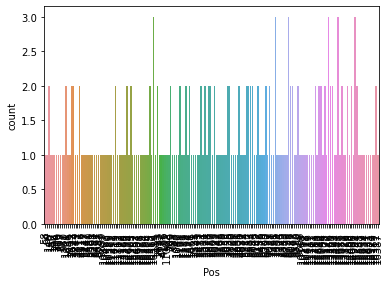

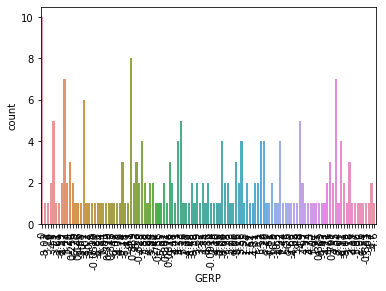

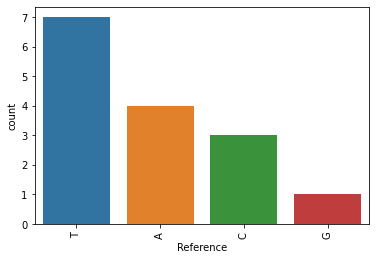

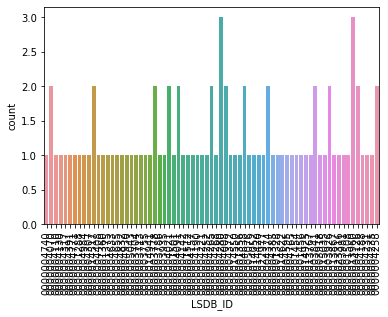

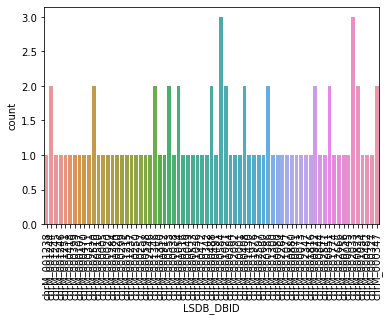

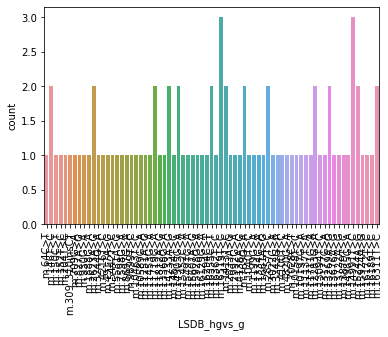

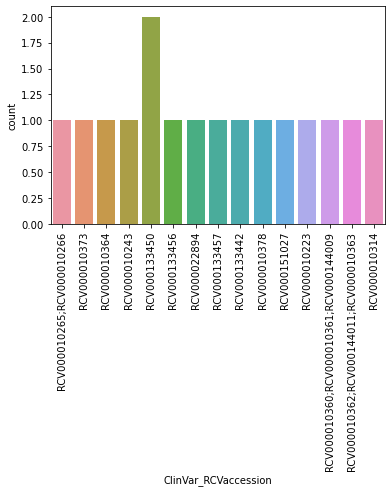

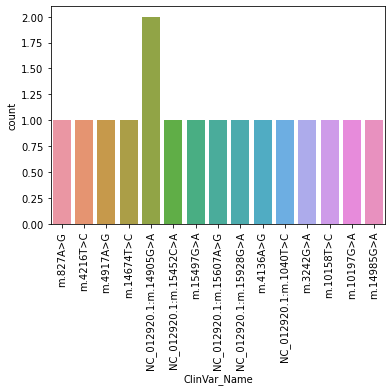

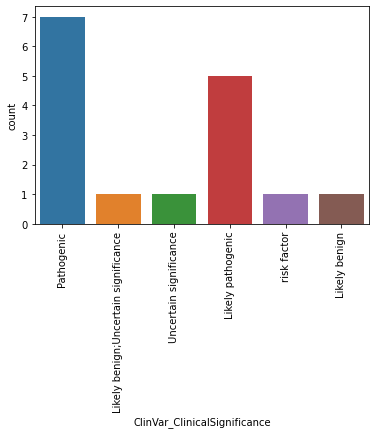

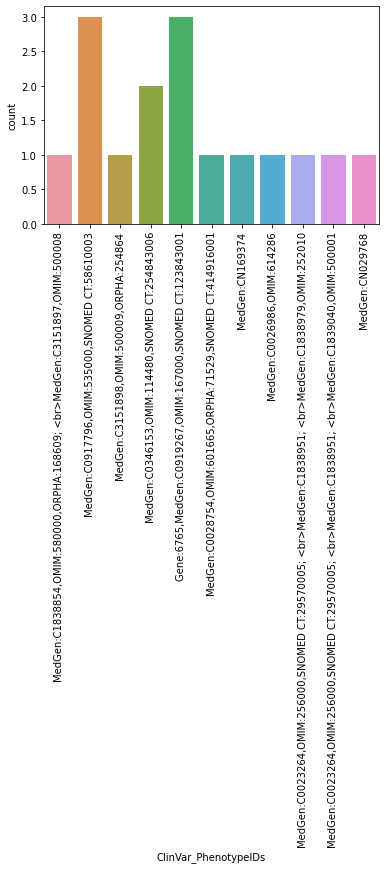

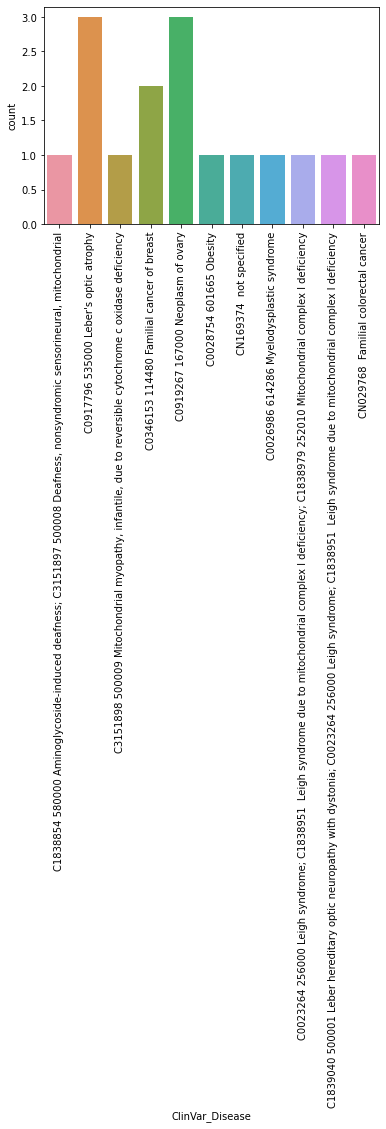

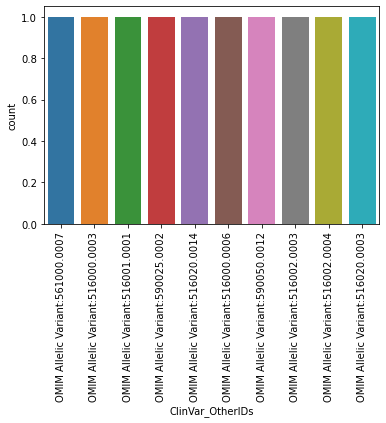

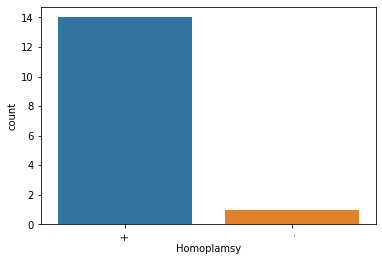

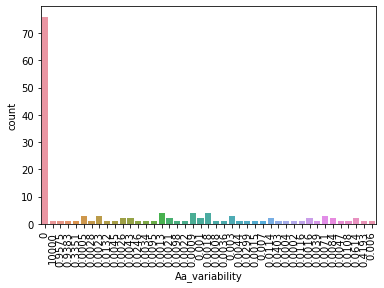

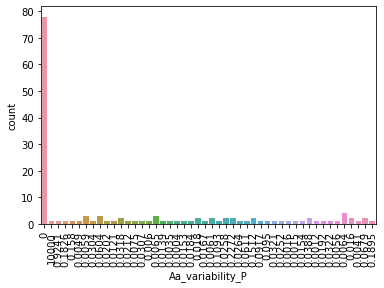

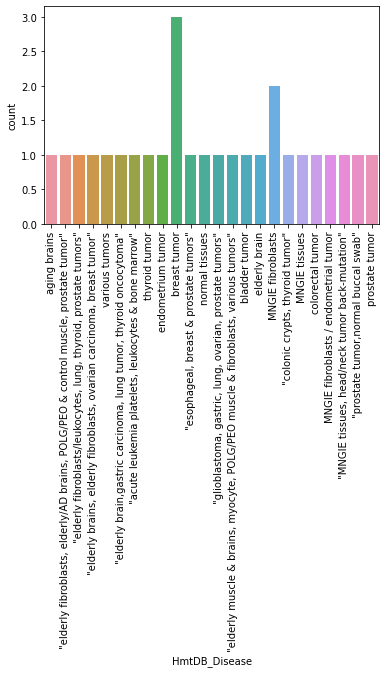

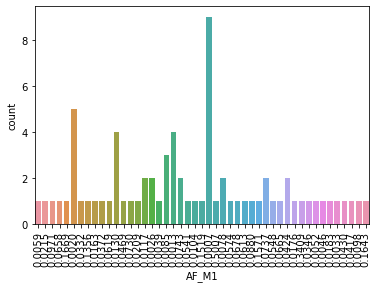

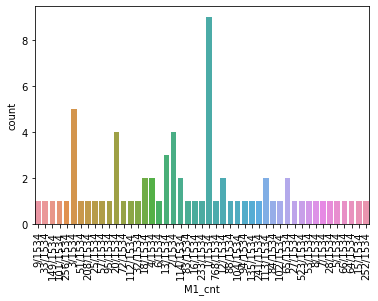

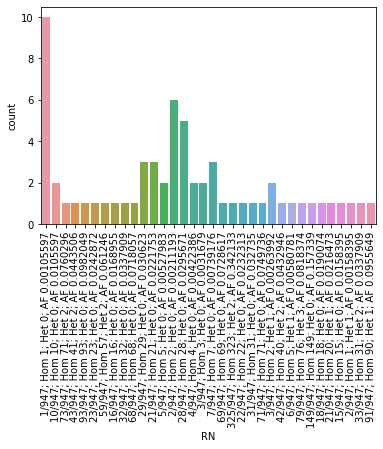

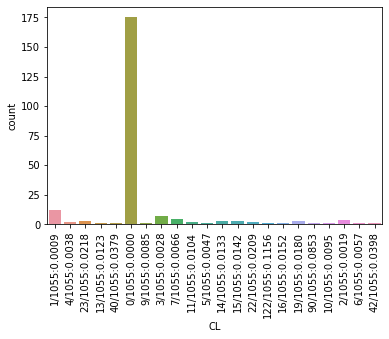

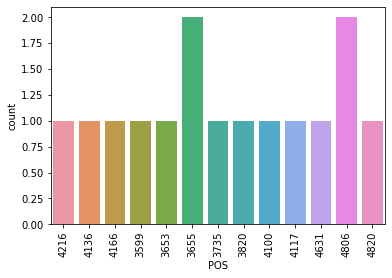

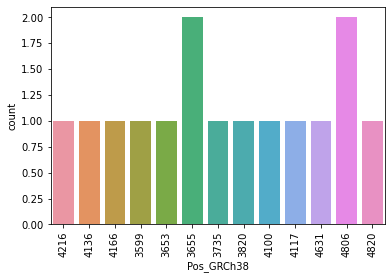

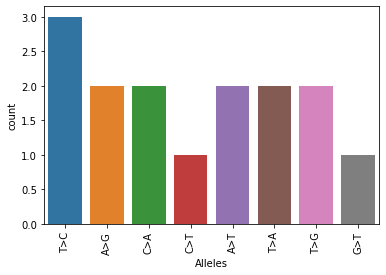

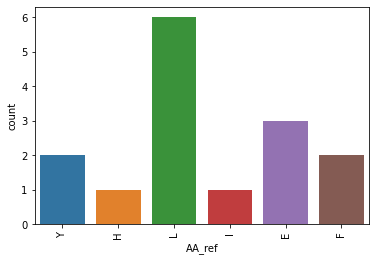

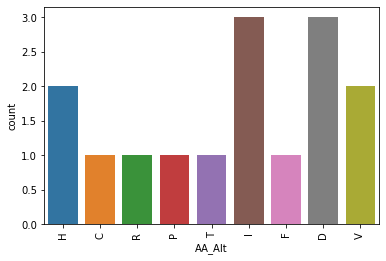

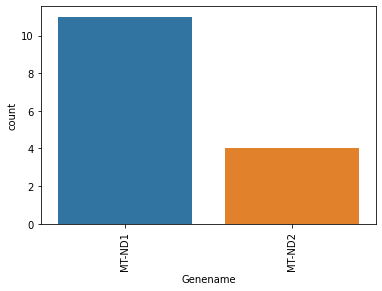

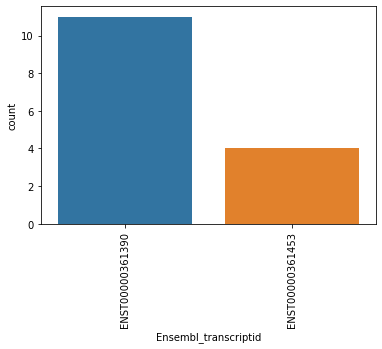

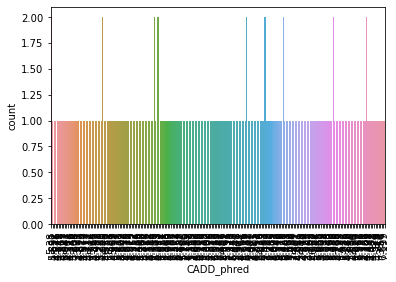

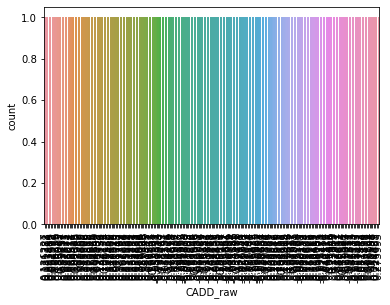

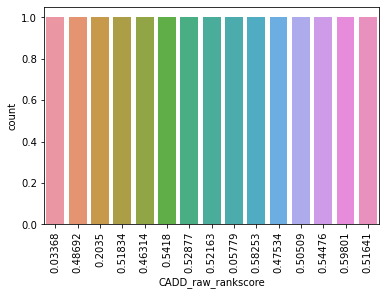

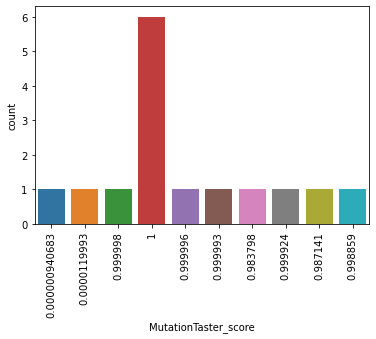

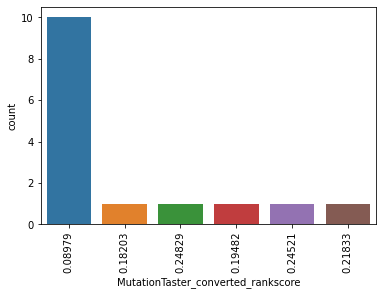

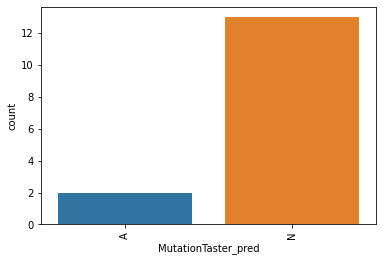

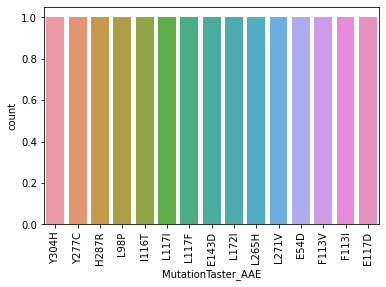

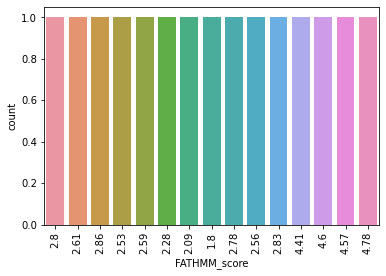

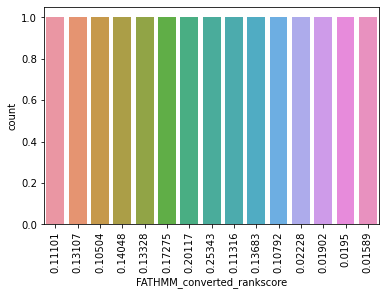

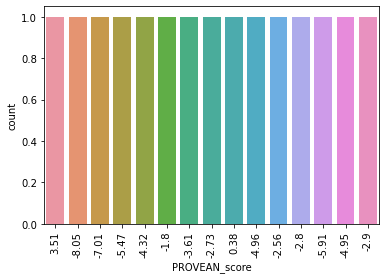

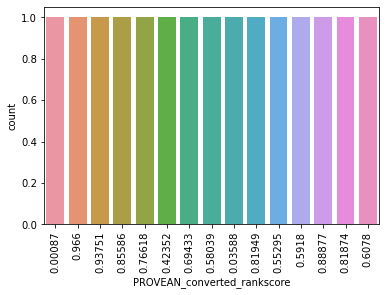

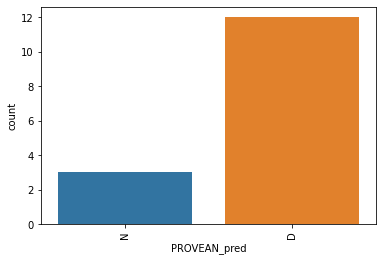

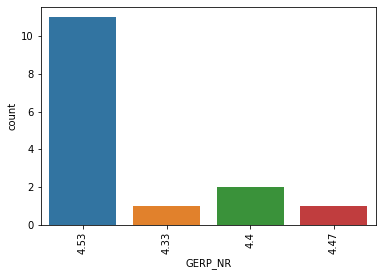

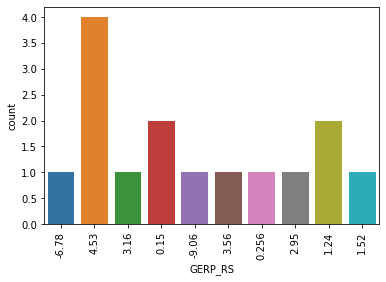

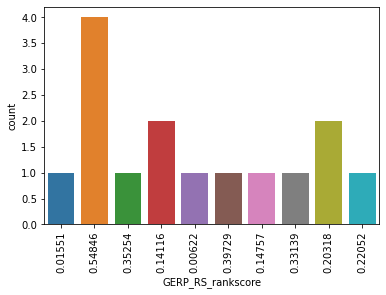

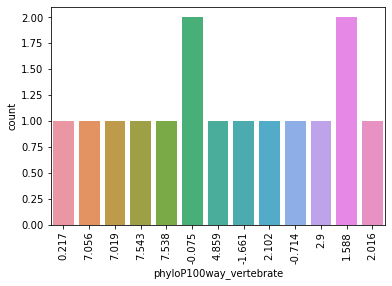

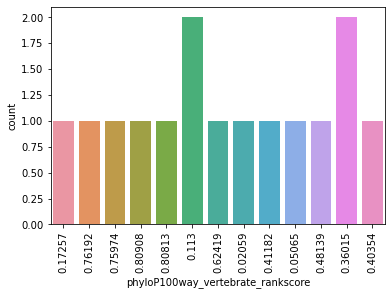

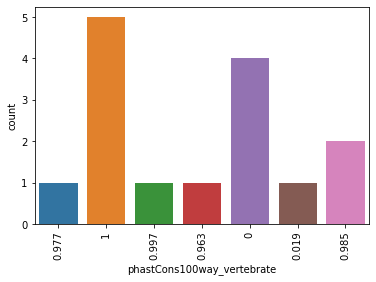

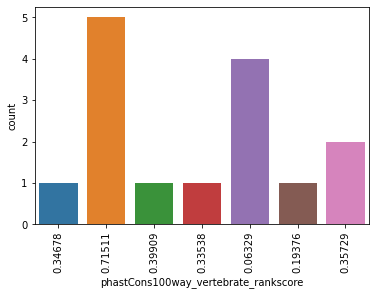

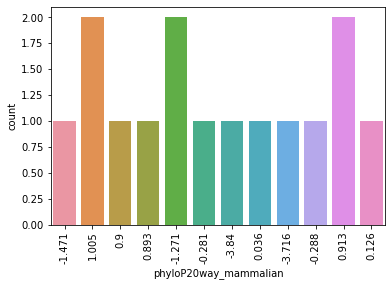

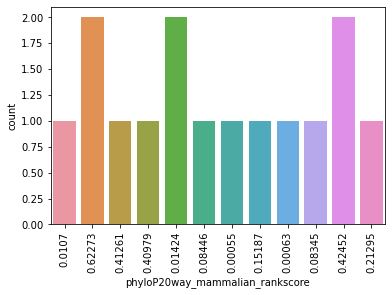

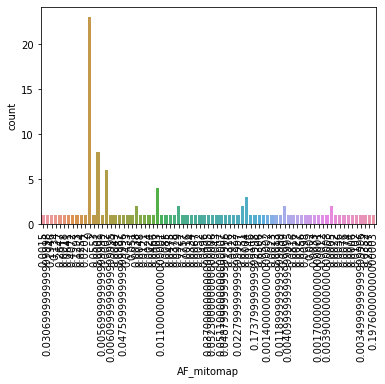

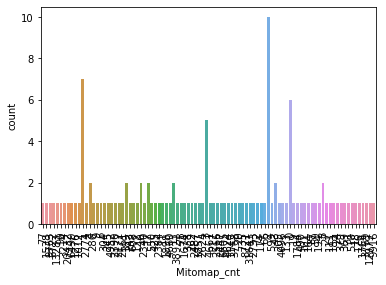

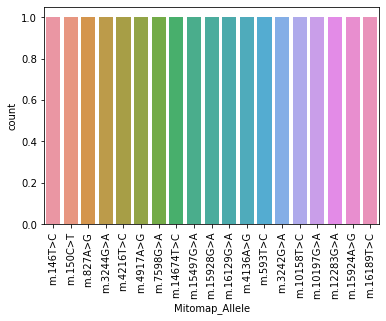

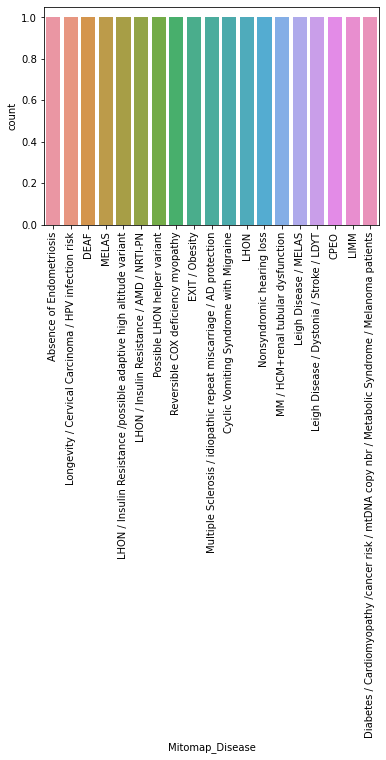

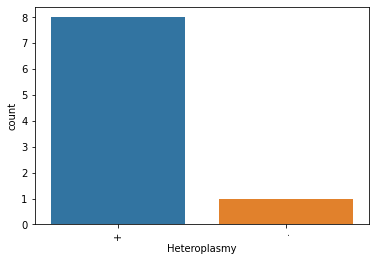

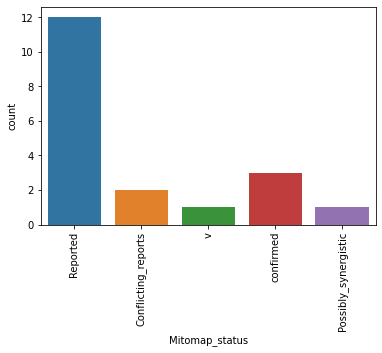

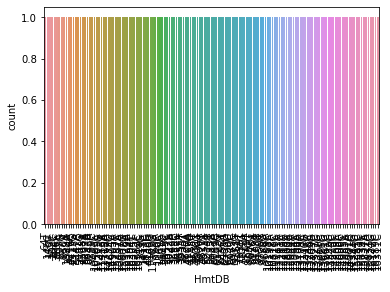

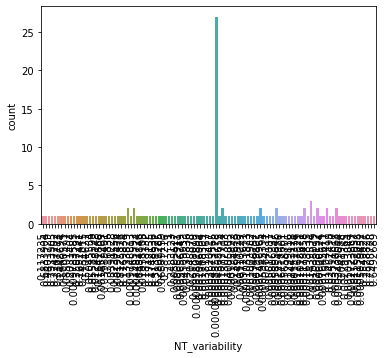

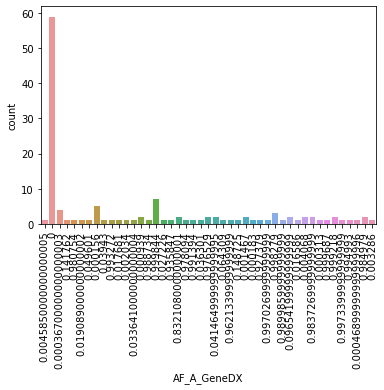

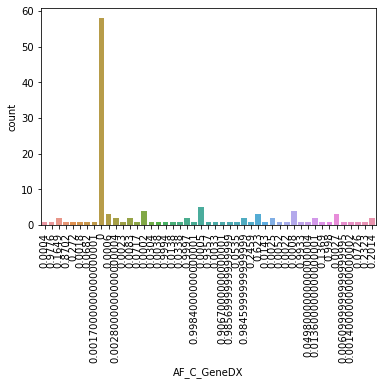

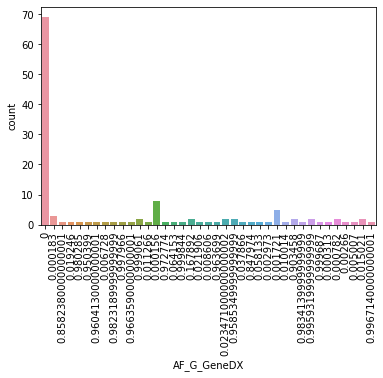

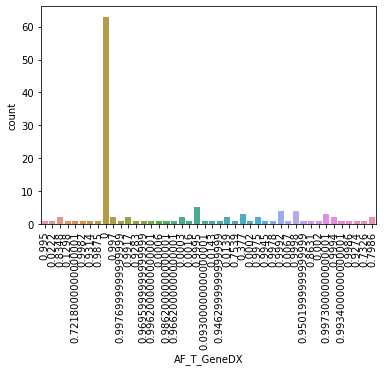

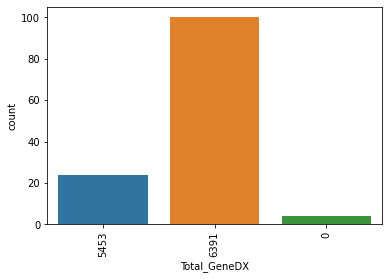

In [119]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
for x in var_anno_df.columns:
    if not len(var_anno_df[x].dropna().unique())==1:
        f=plt.figure()
        sns.countplot(data=var_anno_df,x=x)
        plt.xticks(rotation=90)